In [1]:
# General Libraries
import pandas as pd
import numpy as np

# Visualization Libraries
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('diabetic_data.csv')


In [3]:
df.head()


,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [4]:
print('The shape of the Dataset is :', df.shape, 'with', df.shape[0], 'records and', df.shape[1], 'columns')

The shape of the Dataset is : (101766, 50) with 101766 records and 50 columns


In [5]:
df.columns


Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [6]:
print('There are total', len(df.columns), 'columns in the dataset.')
df.shape

There are total 50 columns in the dataset.


(101766, 50)

In [7]:
df.describe(include = 'all').T


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
encounter_id,101766.0,NaN,NaN,NaN,165201645.622978,102640295.983457,12522.0,84961194.0,152388987.0,230270887.5,443867222.0
patient_nbr,101766.0,NaN,NaN,NaN,54330400.694947,38696359.346534,135.0,23413221.0,45505143.0,87545949.75,189502619.0
race,101766,6,Caucasian,76099,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,101766,3,Female,54708,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,101766,10,[70-80),26068,NaN,NaN,NaN,NaN,NaN,NaN,NaN
weight,101766,10,?,98569,NaN,NaN,NaN,NaN,NaN,NaN,NaN
admission_type_id,101766.0,NaN,NaN,NaN,2.024006,1.445403,1.0,1.0,1.0,3.0,8.0
discharge_disposition_id,101766.0,NaN,NaN,NaN,3.715642,5.280166,1.0,1.0,1.0,4.0,28.0
admission_source_id,101766.0,NaN,NaN,NaN,5.754437,4.064081,1.0,1.0,7.0,7.0,25.0
time_in_hospital,101766.0,NaN,NaN,NaN,4.395987,2.985108,1.0,2.0,4.0,6.0,14.0


In [84]:
for i in df.columns:
    print(i, df[df[i] == '?'].shape[0])

encounter_id 0
patient_nbr 0
race 0
gender 0
age 0
admission_type_id 0
discharge_disposition_id 0
admission_source_id 0
time_in_hospital 0
num_lab_procedures 0
num_procedures 0
num_medications 0
number_outpatient 0
number_emergency 0
number_inpatient 0
diag_1 0
diag_2 0
diag_3 0
number_diagnoses 0
max_glu_serum 0
A1Cresult 0
metformin 0
repaglinide 0
nateglinide 0
chlorpropamide 0
glimepiride 0
glipizide 0
glyburide 0
pioglitazone 0
rosiglitazone 0
acarbose 0
miglitol 0
insulin 0
glyburide-metformin 0
change 0
diabetesMed 0
readmitted 0
readmitted_2 0
is_child 0
is_adult 0
is_senior 0


In [9]:
print('There are', len(df['patient_nbr'].unique()), 'unique patients in the data.')


There are 71518 unique patients in the data.


In [10]:
print('There are', len(df['encounter_id'].unique()), 'unique encounters in the data.')


There are 101766 unique encounters in the data.


In [11]:
# If we divide total patient with total encounter, we can get the average encounters per patient.
len(df['encounter_id'].unique())/len(df['patient_nbr'].unique())

1.4229424760200229

In [12]:
df_encounters_check = df.groupby(['patient_nbr']).agg(encounters = ('encounter_id', 'count')).reset_index().sort_values(['encounters'], ascending = False)

In [13]:
df_encounters_check[df_encounters_check['encounters']==1]


,patient_nbr,encounters
67782,113027103,1
47538,76294341,1
69175,128362955,1
47108,74831733,1
68950,124906928,1
...,...,...
26948,34935156,1
26949,34935795,1
26950,34935804,1
26951,34937658,1


In [14]:
df['readmitted'].value_counts()


NO     54864
>30    35545
<30    11357
Name: readmitted, dtype: int64

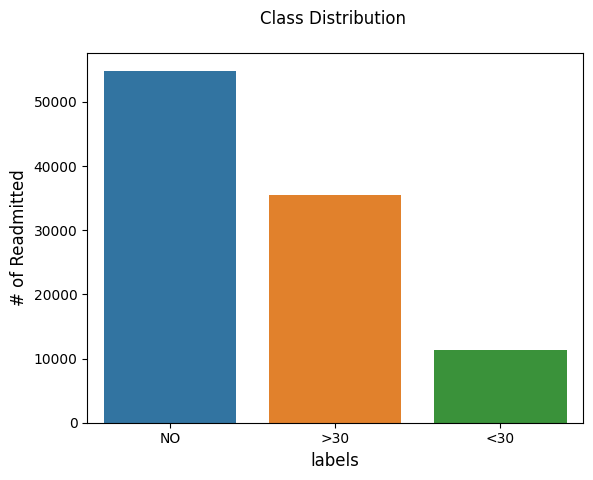

In [15]:
ax = sns.barplot(x=df['readmitted'].value_counts().index,   y=df['readmitted'].value_counts())
plt.xlabel('labels', size = 12)
plt.ylabel('# of Readmitted', size = 12)
plt.title('Class Distribution \n', size = 12)
plt.show()

In [16]:
df['readmitted'].unique()


array(['NO', '>30', '<30'], dtype=object)

In [17]:
# Created another column and take it as 2 class problem, Label the <30 and >30 as YES and Other "N0" as No.

def check_label(text):
    if text == '>30' or text =='<30':
        return 'Yes'
    else:
        return 'No'
    
df['readmitted_2'] =df['readmitted'].apply(check_label) 

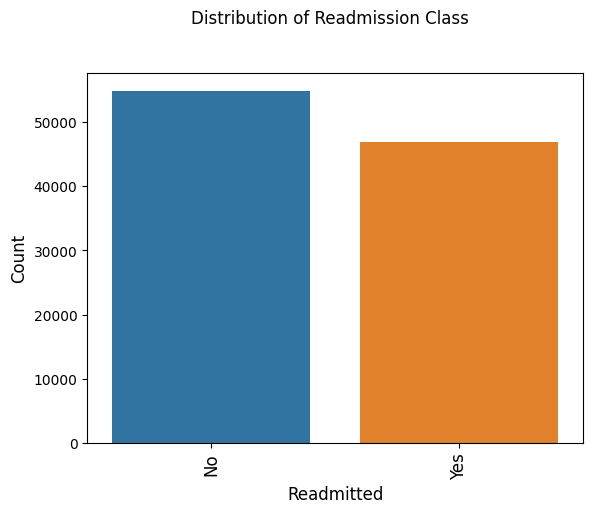

In [18]:
ax = sns.countplot(x='readmitted_2',   data= df)
plt.xlabel('Readmitted', size = 12)
plt.xticks(rotation=90, size = 12)
plt.ylabel('Count', size = 12)
plt.title('Distribution of Readmission Class  \n\n', size = 12)
plt.show()

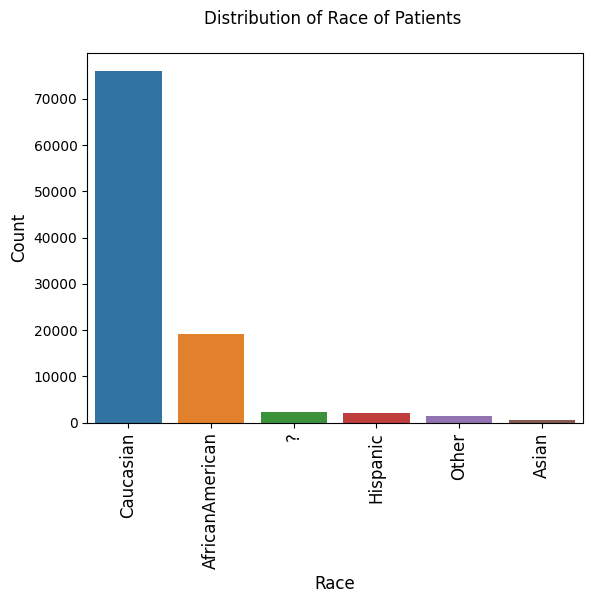

In [19]:
ax = sns.barplot(x=df['race'].value_counts().index,   y=df['race'].value_counts())
plt.xlabel('Race', size = 12)
plt.xticks(rotation=90, size = 12)
plt.ylabel('Count', size = 12)
plt.title('Distribution of Race of Patients \n', size = 12)
plt.show()

In [20]:
df.loc[df['race'] == '?', 'race'] = 'Other'


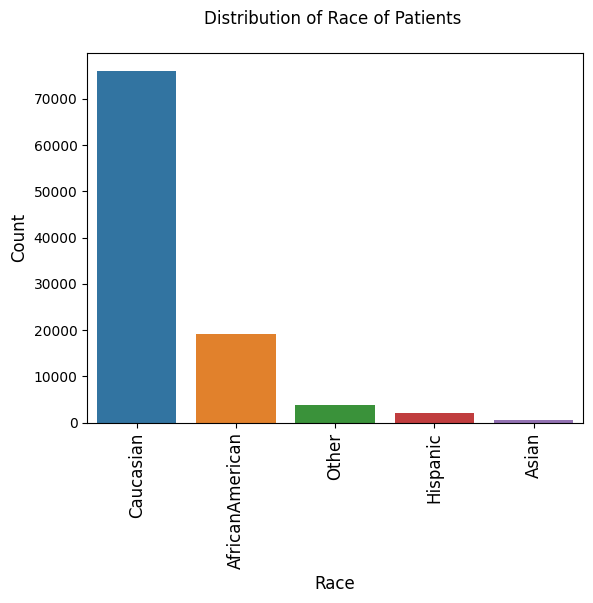

In [21]:
ax = sns.barplot(x=df['race'].value_counts().index,   y=df['race'].value_counts())
plt.xlabel('Race', size = 12)
plt.xticks(rotation=90, size = 12)
plt.ylabel('Count', size = 12)
plt.title('Distribution of Race of Patients \n', size = 12)
plt.show()

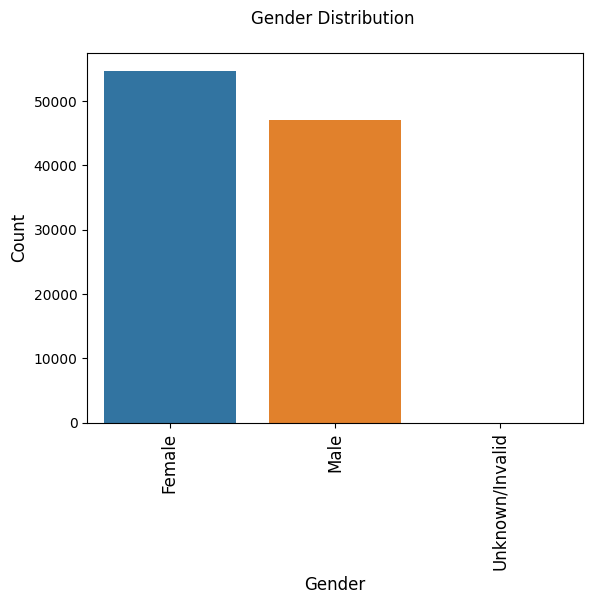

In [22]:
ax = sns.countplot(x='gender',   data= df)
plt.xlabel('Gender', size = 12)
plt.xticks(rotation=90, size = 12)
plt.ylabel('Count', size = 12)
plt.title('Gender Distribution \n', size = 12)
plt.show()

In [23]:
df['gender'].value_counts()


Female             54708
Male               47055
Unknown/Invalid        3
Name: gender, dtype: int64

In [24]:
df[df['gender']!='Unknown/Invalid']


,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,readmitted_2
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,NO,No
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,Up,No,No,No,No,No,Ch,Yes,>30,Yes
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,Yes,NO,No
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,Up,No,No,No,No,No,Ch,Yes,NO,No
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,Steady,No,No,No,No,No,Ch,Yes,NO,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,[70-80),?,1,3,7,3,...,Down,No,No,No,No,No,Ch,Yes,>30,Yes
101762,443847782,74694222,AfricanAmerican,Female,[80-90),?,1,4,5,5,...,Steady,No,No,No,No,No,No,Yes,NO,No
101763,443854148,41088789,Caucasian,Male,[70-80),?,1,1,7,1,...,Down,No,No,No,No,No,Ch,Yes,NO,No
101764,443857166,31693671,Caucasian,Female,[80-90),?,2,3,7,10,...,Up,No,No,No,No,No,Ch,Yes,NO,No


In [25]:
# Drop the "Unknown/Invalid" gender of the data.
df.drop(df[df['gender'] == 'Unknown/Invalid'].index, inplace = True)

In [26]:
df.reset_index(inplace = True, drop = True)


In [27]:
df.shape


(101763, 51)

In [28]:
df.head()


,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,readmitted_2
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,NO,No
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,Up,No,No,No,No,No,Ch,Yes,>30,Yes
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,Yes,NO,No
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,Up,No,No,No,No,No,Ch,Yes,NO,No
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,Steady,No,No,No,No,No,Ch,Yes,NO,No


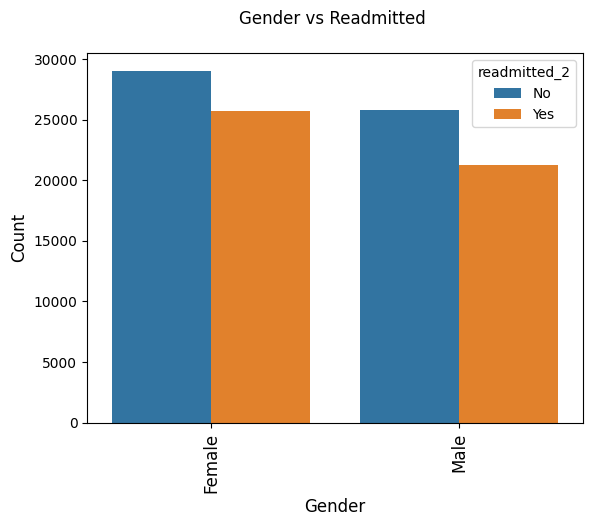

In [29]:
ax = sns.countplot(x="gender", hue="readmitted_2", data=df)
plt.xlabel('Gender', size = 12)
plt.xticks(rotation=90, size = 12)
plt.ylabel('Count', size = 12)
plt.title('Gender vs Readmitted \n', size = 12)
plt.show()

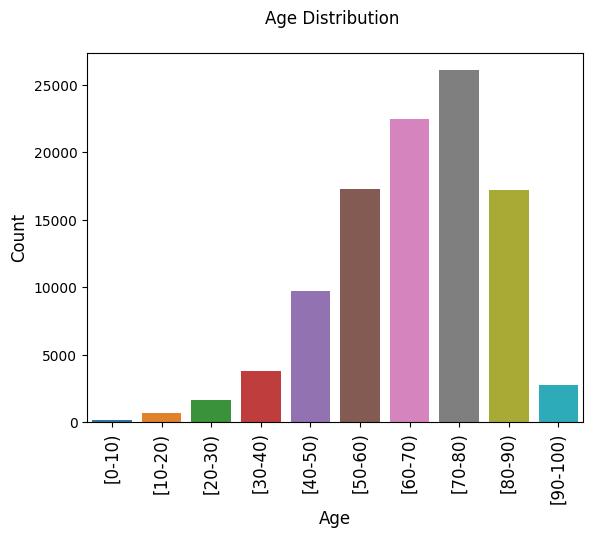

In [30]:
ax = sns.countplot(x='age',   data= df)
plt.xlabel('Age', size = 12)
plt.xticks(rotation=90, size = 12)
plt.ylabel('Count', size = 12)
plt.title('Age Distribution \n', size = 12)
plt.show()

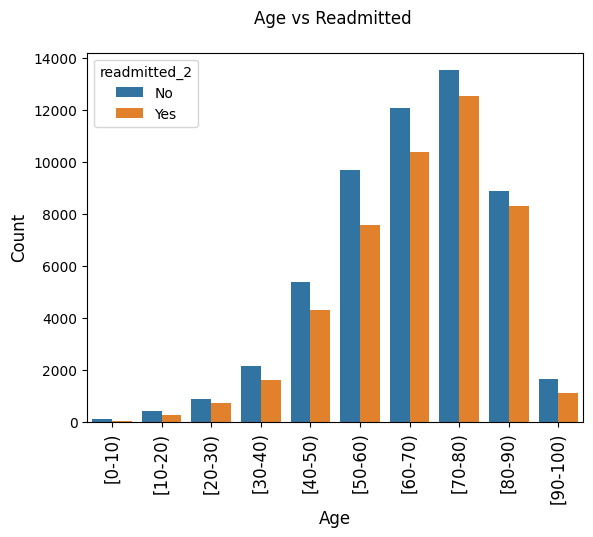

In [31]:
ax = sns.countplot(x="age", hue="readmitted_2", data=df)
plt.xlabel('Age', size = 12)
plt.xticks(rotation=90, size = 12)
plt.ylabel('Count', size = 12)
plt.title('Age vs Readmitted \n', size = 12)
plt.show()

In [32]:
df.shape


(101763, 51)

In [33]:
# Extracting numerical part of age categories and converting to integers
df['age'] = df['age'].str.extract('(\d+)').astype(int)

# Feature Engineering - Creating binary features from 'age' with extended categories
df['is_child'] = np.where((df['age'] >= 0) & (df['age'] < 18), 1, 0)
df['is_adult'] = np.where((df['age'] >= 18) & (df['age'] < 65), 1, 0)
df['is_senior'] = np.where(df['age'] >= 65, 1, 0)


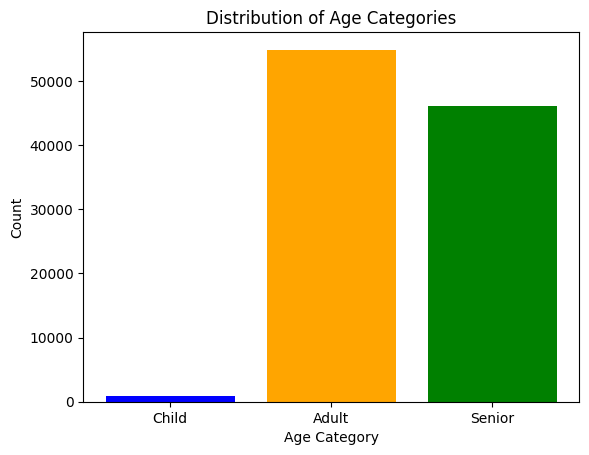

In [34]:
import matplotlib.pyplot as plt

# Counting occurrences of each category
child_count = df['is_child'].sum()
adult_count = df['is_adult'].sum()
senior_count = df['is_senior'].sum()

# Creating a bar plot
categories = ['Child', 'Adult', 'Senior']
counts = [child_count, adult_count, senior_count]

plt.bar(categories, counts, color=['blue', 'orange', 'green'])
plt.xlabel('Age Category')
plt.ylabel('Count')
plt.title('Distribution of Age Categories')
plt.show()


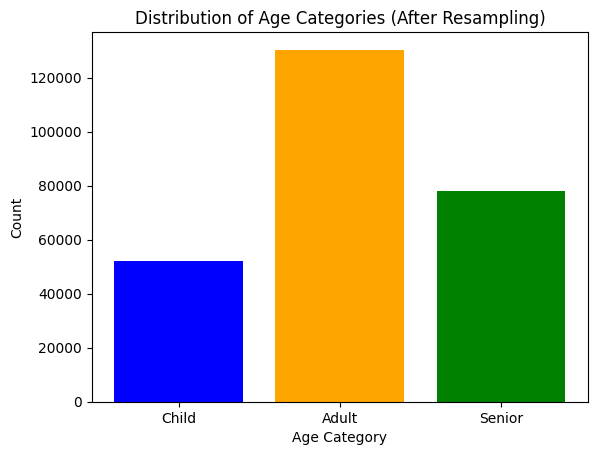

In [35]:
from imblearn.over_sampling import RandomOverSampler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have already imported necessary libraries and preprocessed the data

# Resample the data to balance the classes
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(df[['age']], df['age'])

# Convert the resampled data back to DataFrame
df_resampled = pd.DataFrame(X_resampled, columns=['age'])
df_resampled['age'] = y_resampled

# Feature Engineering - Creating binary features from 'age' with extended categories
df_resampled['is_child'] = np.where((df_resampled['age'] >= 0) & (df_resampled['age'] < 18), 1, 0)
df_resampled['is_adult'] = np.where((df_resampled['age'] >= 18) & (df_resampled['age'] < 65), 1, 0)
df_resampled['is_senior'] = np.where(df_resampled['age'] >= 65, 1, 0)

# Recalculate the counts for each category
child_count = df_resampled['is_child'].sum()
adult_count = df_resampled['is_adult'].sum()
senior_count = df_resampled['is_senior'].sum()

# Creating a bar plot
categories = ['Child', 'Adult', 'Senior']
counts = [child_count, adult_count, senior_count]

plt.bar(categories, counts, color=['blue', 'orange', 'green'])
plt.xlabel('Age Category')
plt.ylabel('Count')
plt.title('Distribution of Age Categories (After Resampling)')
plt.show()


In [36]:
child_count = df_resampled[df_resampled['is_child'] == 1].shape[0]
adult_count = df_resampled[df_resampled['is_adult'] == 1].shape[0]
senior_count = df_resampled[df_resampled['is_senior'] == 1].shape[0]

print("Child Count:", child_count)
print("Adult Count:", adult_count)
print("Senior Count:", senior_count)


Child Count: 52132
Adult Count: 130330
Senior Count: 78198


In [37]:
df.shape


(101763, 54)

In [38]:

df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,readmitted_2,is_child,is_adult,is_senior
0,2278392,8222157,Caucasian,Female,0,?,6,25,1,1,...,No,No,No,No,No,NO,No,1,0,0
1,149190,55629189,Caucasian,Female,10,?,1,1,7,3,...,No,No,No,Ch,Yes,>30,Yes,1,0,0
2,64410,86047875,AfricanAmerican,Female,20,?,1,1,7,2,...,No,No,No,No,Yes,NO,No,0,1,0
3,500364,82442376,Caucasian,Male,30,?,1,1,7,2,...,No,No,No,Ch,Yes,NO,No,0,1,0
4,16680,42519267,Caucasian,Male,40,?,1,1,7,1,...,No,No,No,Ch,Yes,NO,No,0,1,0


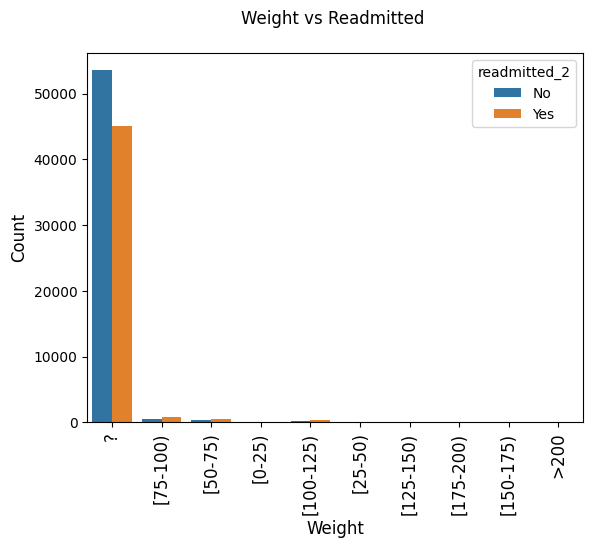

In [39]:
ax = sns.countplot(x="weight", hue="readmitted_2", data=df)
plt.xlabel('Weight', size = 12)
plt.xticks(rotation=90, size = 12)
plt.ylabel('Count', size = 12)
plt.title('Weight vs Readmitted \n', size = 12)
plt.show()

In [40]:
# Lets drop this column. 
df.drop(columns = ['weight'], inplace = True)

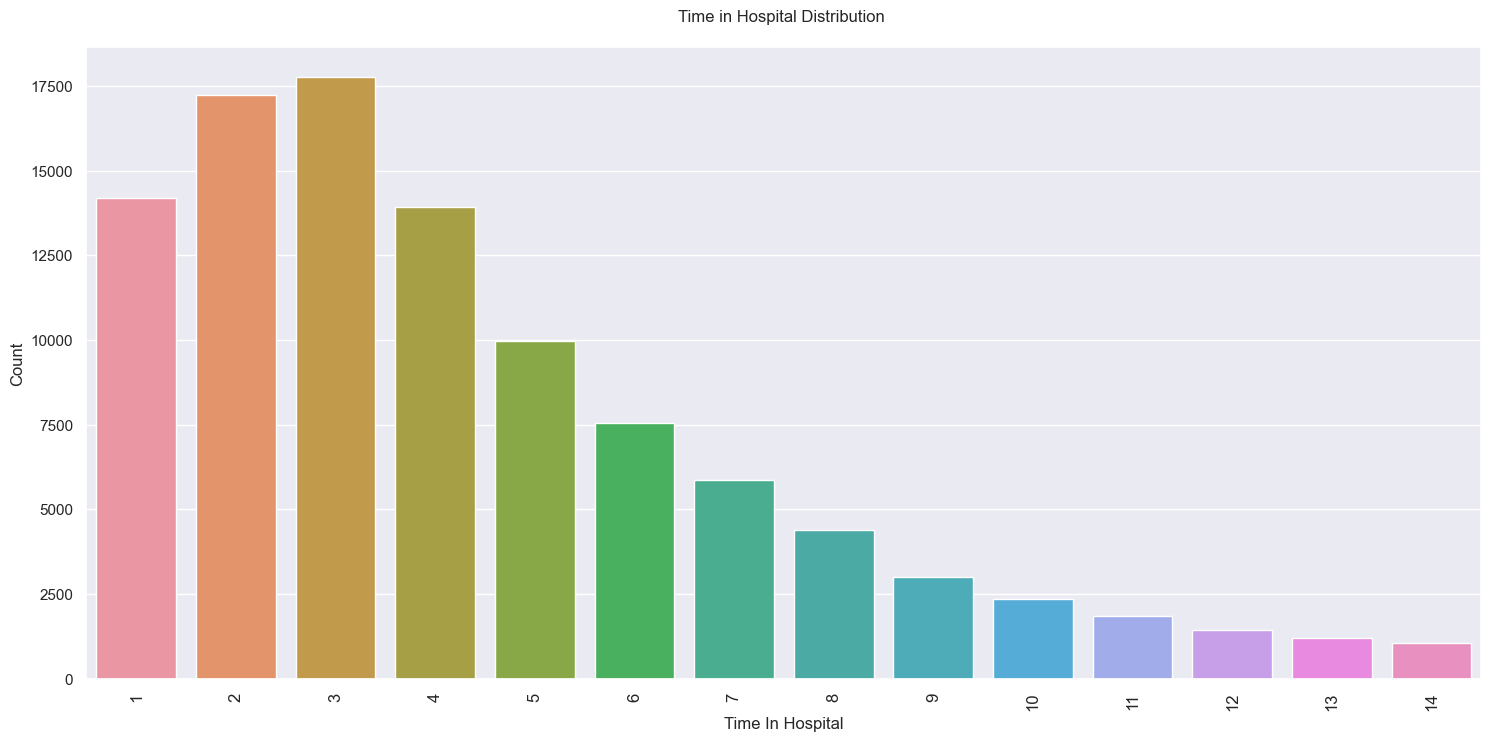

In [41]:
sns.set(rc={'figure.figsize':(18,8.2)})
ax = sns.countplot(x='time_in_hospital',   data= df)
plt.xlabel('Time In Hospital', size = 12)
plt.xticks(rotation=90, size = 12)
plt.ylabel('Count', size = 12)
plt.title('Time in Hospital Distribution \n', size = 12)
plt.show()

In [42]:
df['time_in_hospital'].mean()


4.396018199149003

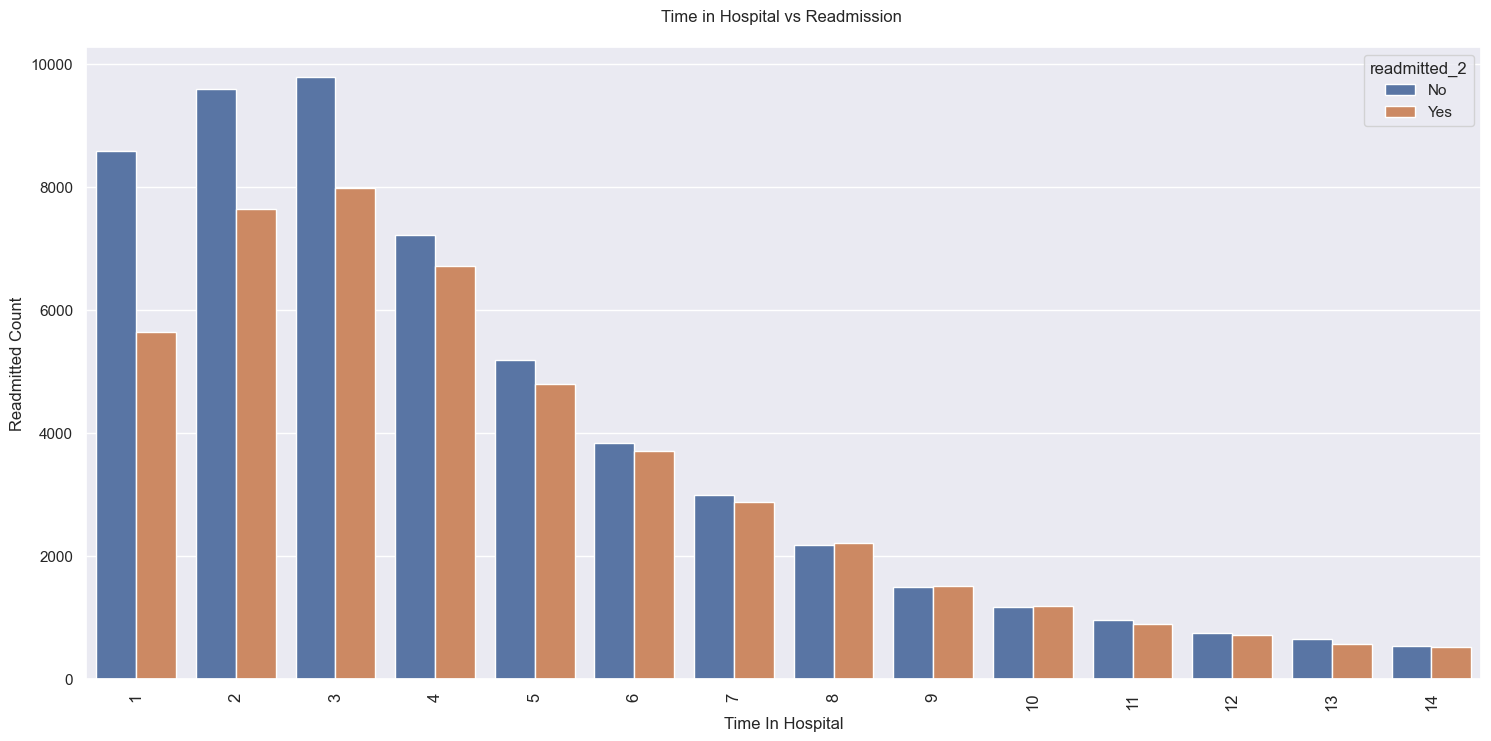

In [43]:
sns.set(rc={'figure.figsize':(18,8.2)})
ax = sns.countplot(x='time_in_hospital',  hue= 'readmitted_2',  data= df)
plt.xlabel('Time In Hospital', size = 12)
plt.xticks(rotation=90, size = 12)
plt.ylabel('Readmitted Count', size = 12)
plt.title('Time in Hospital vs Readmission \n', size = 12)
plt.show()

In [44]:
df['payer_code'].value_counts()


?     40255
MC    32439
HM     6274
SP     5007
BC     4655
MD     3532
CP     2531
UN     2448
CM     1937
OG     1033
PO      592
DM      549
CH      146
WC      135
OT       95
MP       79
SI       55
FR        1
Name: payer_code, dtype: int64

In [45]:
df.drop(columns = ['payer_code'], inplace = True)


In [46]:
df.shape

(101763, 52)

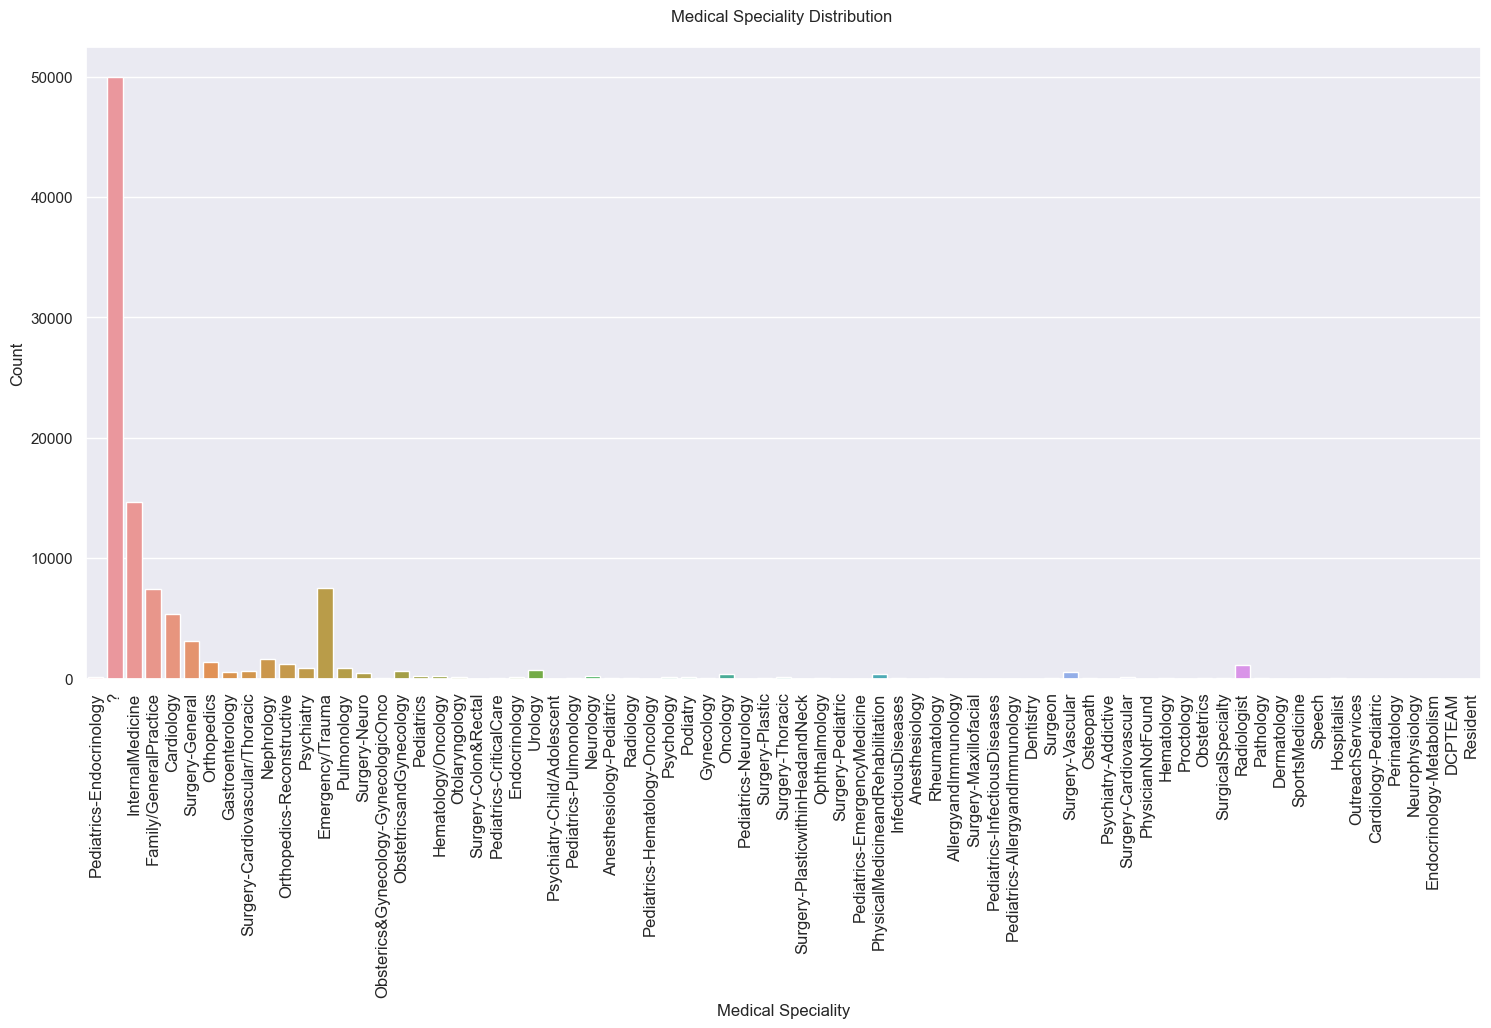

In [47]:
sns.set(rc={'figure.figsize':(18,8.2)})
ax = sns.countplot(x='medical_specialty',   data= df)
plt.xlabel('Medical Speciality', size = 12)
plt.xticks(rotation=90, size = 12)
plt.ylabel('Count', size = 12)
plt.title('Medical Speciality Distribution \n', size = 12)
plt.show()

In [48]:
df.drop(columns =['medical_specialty'], inplace = True)


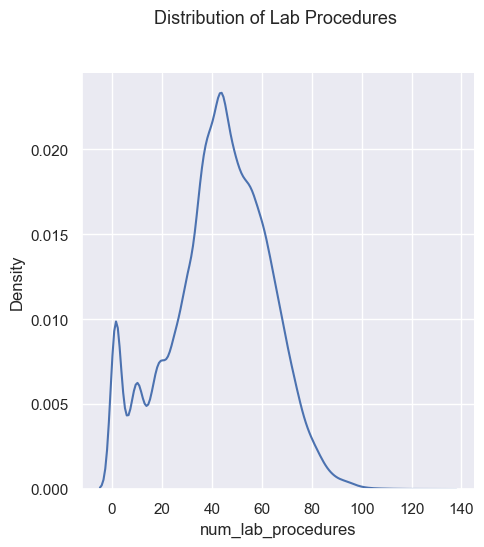

In [49]:
sns.displot(df, x="num_lab_procedures", kind="kde")
plt.title('Distribution of Lab Procedures \n\n', size = 13)
plt.show()

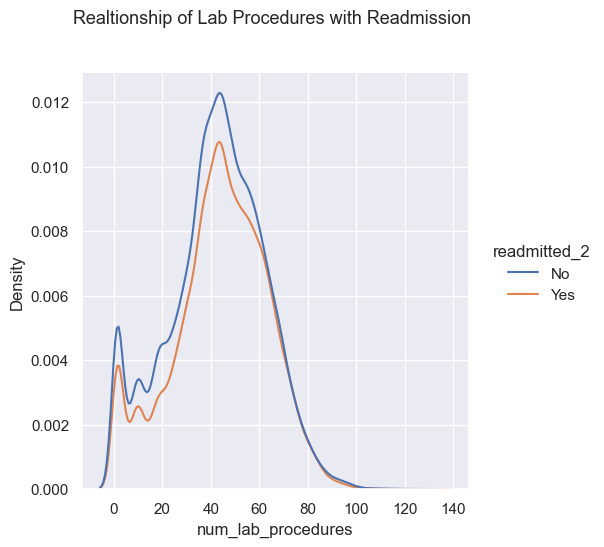

In [50]:
sns.displot(df, x="num_lab_procedures", hue= 'readmitted_2', kind="kde")
plt.title('Realtionship of Lab Procedures with Readmission \n\n', size = 13)
plt.show()

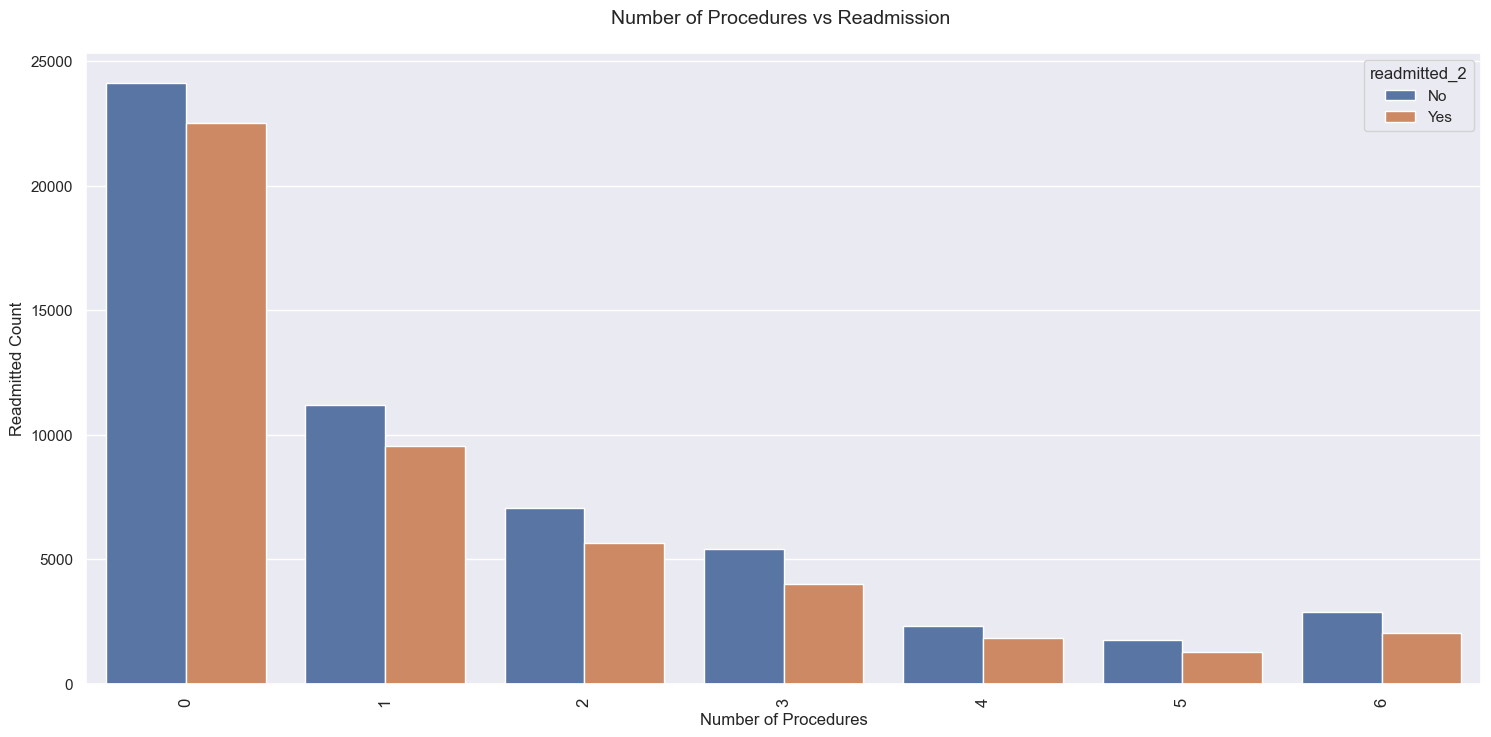

In [51]:
sns.set(rc={'figure.figsize':(18,8.2)})
ax = sns.countplot(x='num_procedures',  hue= 'readmitted_2',  data= df)
plt.xlabel('Number of Procedures', size = 12)
plt.xticks(rotation=90, size = 12)
plt.ylabel('Readmitted Count', size = 12)
plt.title('Number of Procedures vs Readmission \n', size = 14)
plt.show()

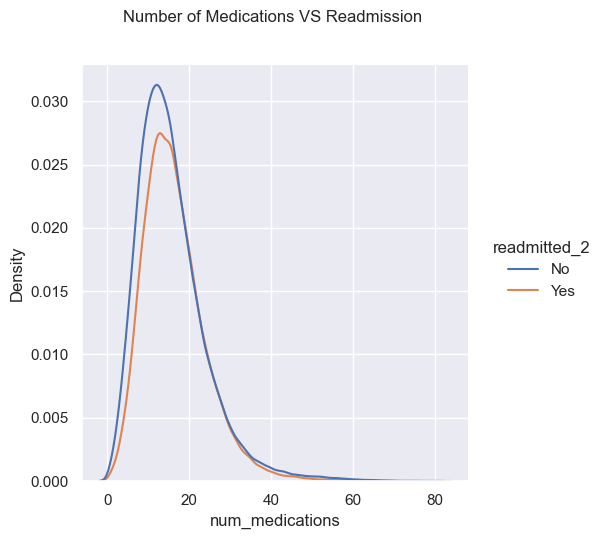

In [52]:
sns.displot(df, x="num_medications", hue= 'readmitted_2', kind="kde")
plt.title('Number of Medications VS Readmission \n\n')
plt.show()

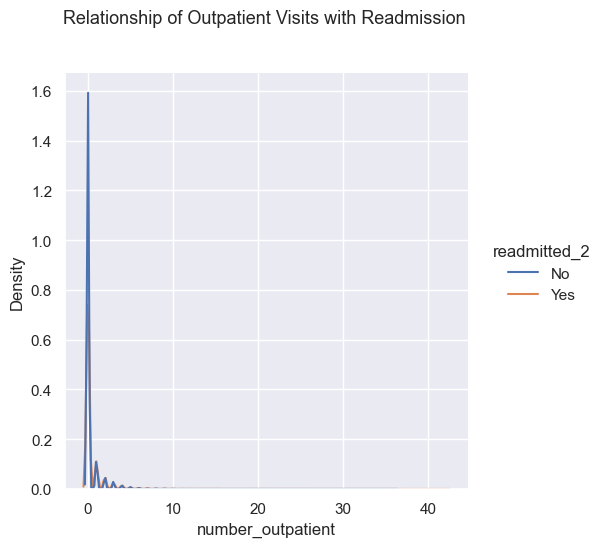

In [53]:
sns.displot(df, x="number_outpatient", hue= 'readmitted_2', kind ='kde')
plt.title('Relationship of Outpatient Visits with Readmission \n\n', size = 13)
plt.show()

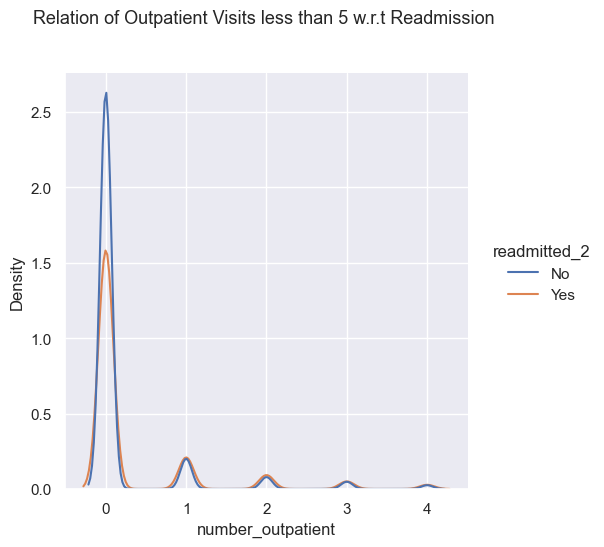

In [54]:
sns.displot(df.loc[df['number_outpatient']<5], x="number_outpatient", hue= 'readmitted_2', kind ='kde')
plt.title('Relation of Outpatient Visits less than 5 w.r.t Readmission \n\n', size = 13)
plt.show()

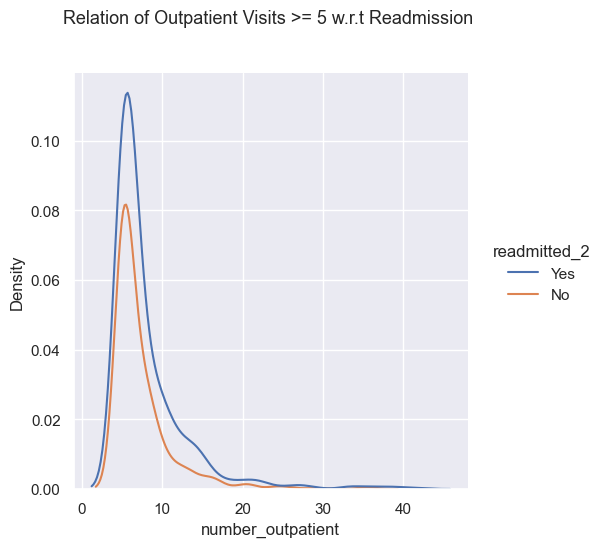

In [55]:
sns.displot(df.loc[df['number_outpatient']>=5], x="number_outpatient", hue= 'readmitted_2', kind ='kde')
plt.title('Relation of Outpatient Visits >= 5 w.r.t Readmission \n\n', size = 13)
plt.show()

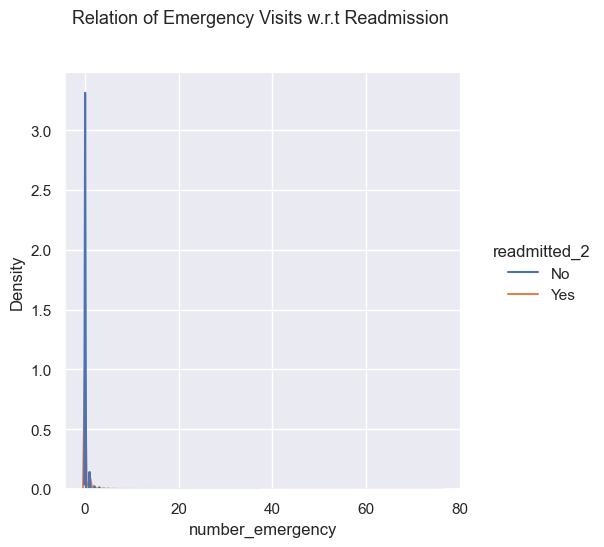

In [56]:
sns.displot(df, x="number_emergency", hue= 'readmitted_2', kind='kde')
plt.title('Relation of Emergency Visits w.r.t Readmission \n\n', size = 13)
plt.show()

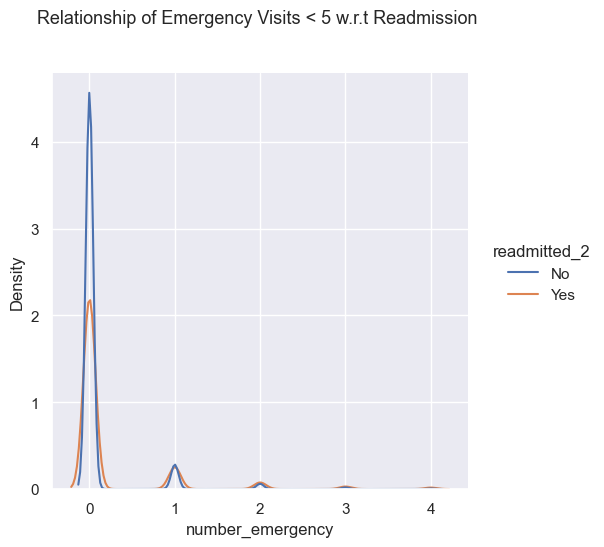

In [57]:
sns.displot(df.loc[df['number_emergency']<5], x="number_emergency", hue= 'readmitted_2', kind='kde')
plt.title('Relationship of Emergency Visits < 5 w.r.t Readmission \n\n', size = 13)
plt.show()

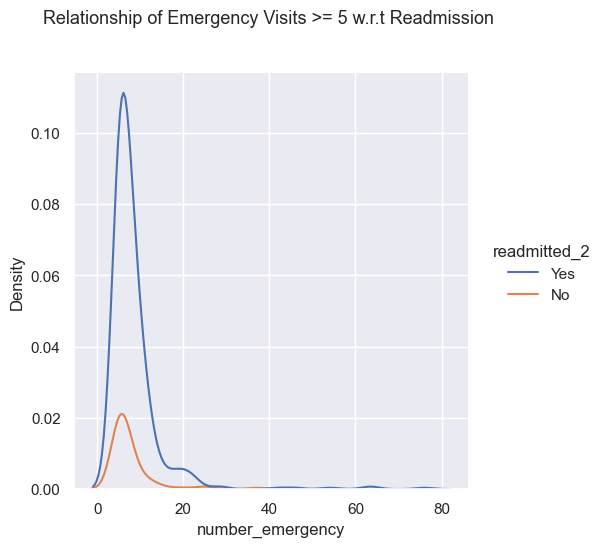

In [58]:
sns.displot(df.loc[df['number_emergency']>=5], x="number_emergency", hue= 'readmitted_2', kind='kde')
plt.title('Relationship of Emergency Visits >= 5 w.r.t Readmission \n\n', size = 13)
plt.show()

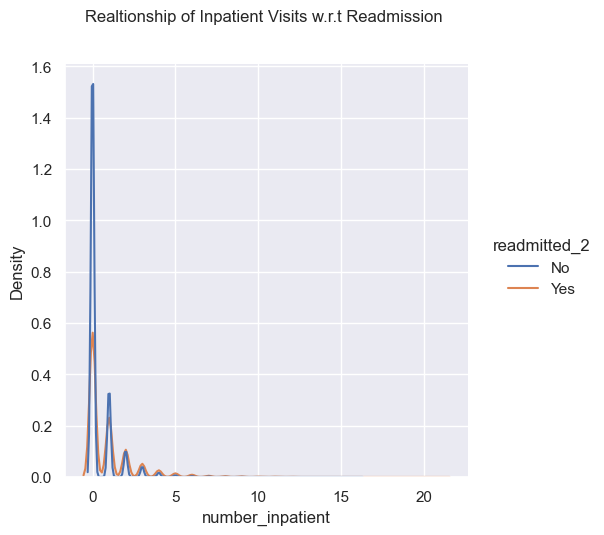

In [59]:
sns.displot(df, x="number_inpatient", hue= 'readmitted_2', kind='kde')
plt.title('Realtionship of Inpatient Visits w.r.t Readmission \n\n')
plt.show()

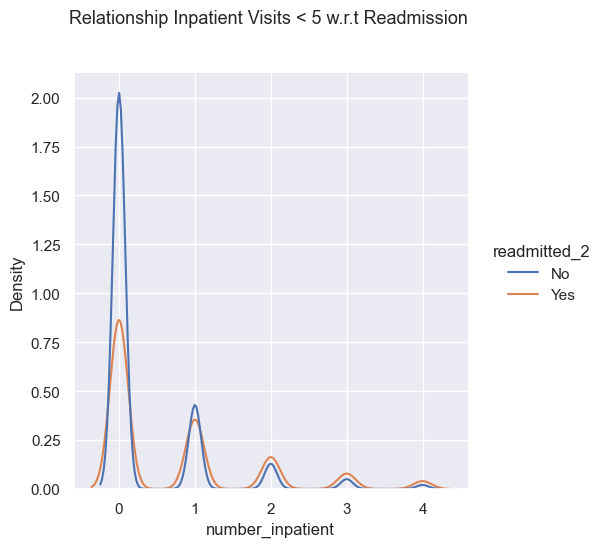

In [60]:
sns.displot(df.loc[df['number_inpatient']<5], x="number_inpatient", hue= 'readmitted_2', kind='kde')
plt.title('Relationship Inpatient Visits < 5 w.r.t Readmission \n\n', size = 13)
plt.show()

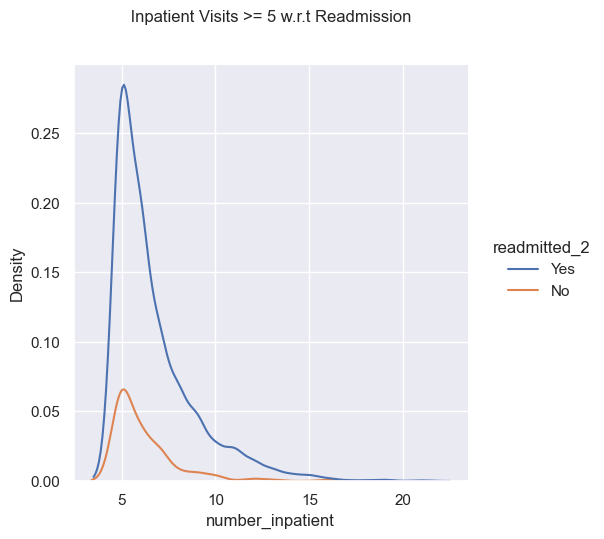

In [61]:
sns.displot(df.loc[df['number_inpatient']>=5], x="number_inpatient", hue= 'readmitted_2', kind='kde')
plt.title(' Inpatient Visits >= 5 w.r.t Readmission \n\n')
plt.show()

In [62]:
len(df['diag_1'].unique()), len(df['diag_2'].unique()), len(df['diag_3'].unique())


(717, 749, 790)

In [63]:
df[df['readmitted_2'] == 'Yes']['diag_1'].value_counts()


428    4057
414    2720
786    1709
486    1683
410    1438
       ... 
838       1
883       1
734       1
378       1
336       1
Name: diag_1, Length: 614, dtype: int64

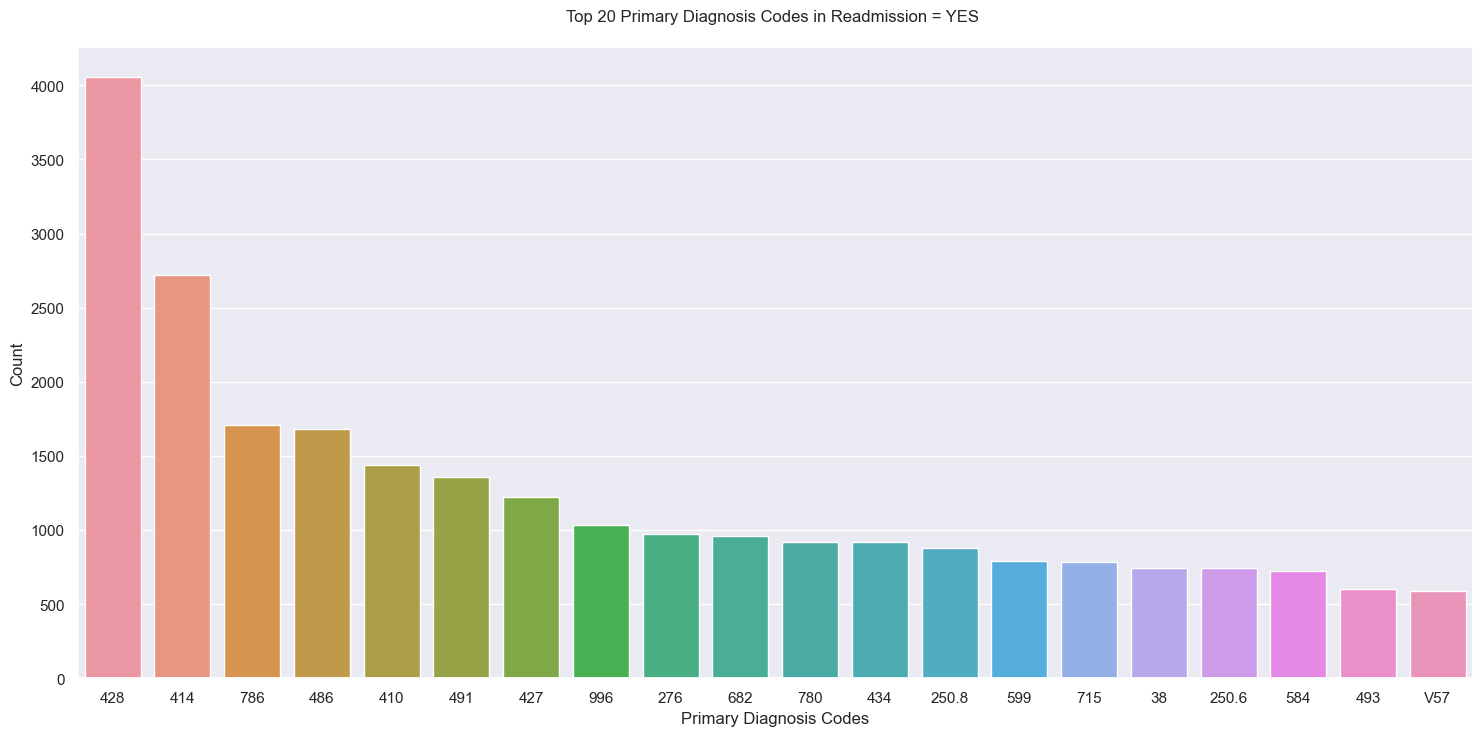

In [64]:
ax = sns.barplot(x=df[df['readmitted_2'] == 'Yes']['diag_1'].value_counts().index[:20],
                 y=df[df['readmitted_2'] == 'Yes']['diag_1'].value_counts()[:20])
plt.xlabel('Primary Diagnosis Codes', size = 12)
plt.ylabel('Count', size = 12)
plt.title('Top 20 Primary Diagnosis Codes in Readmission = YES \n', size = 12)
plt.show()

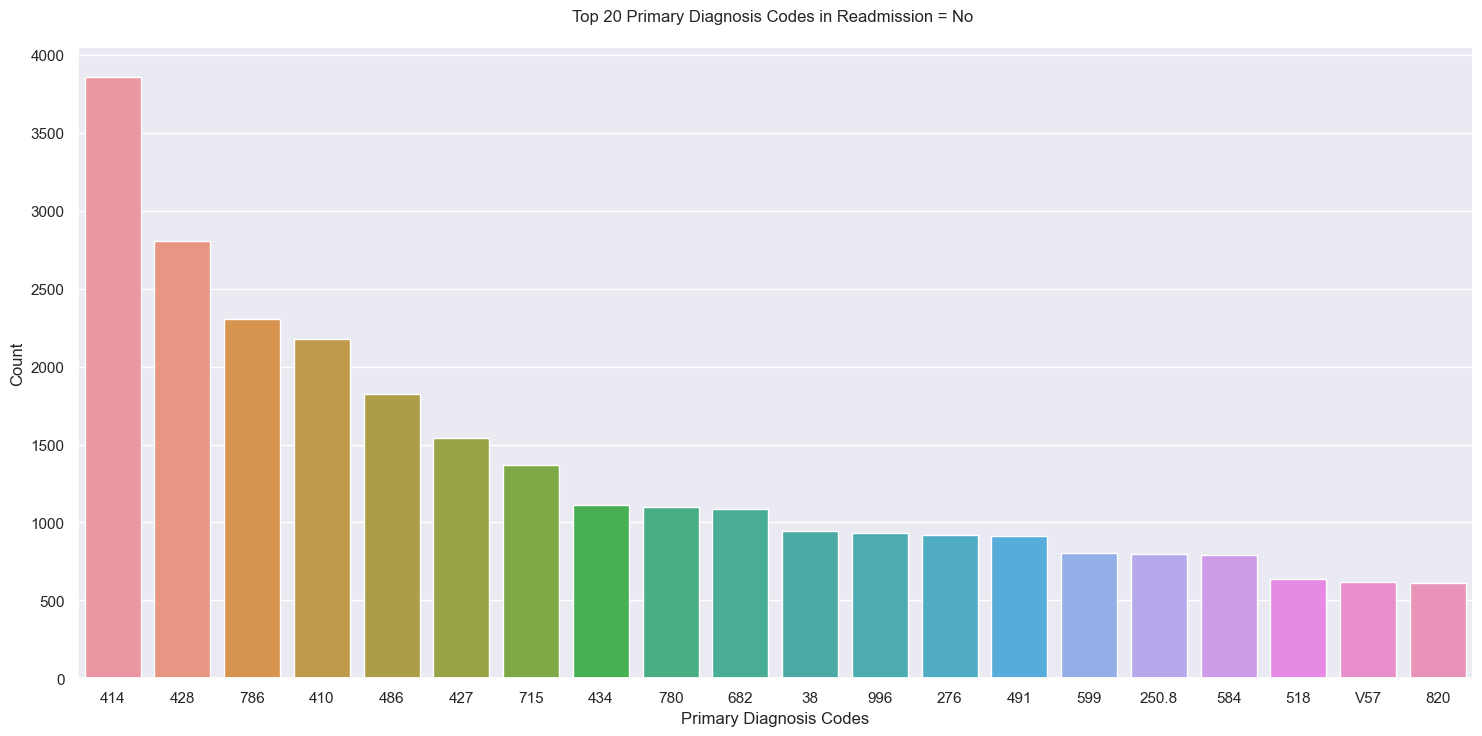

In [65]:
ax = sns.barplot(x=df[df['readmitted_2'] == 'No']['diag_1'].value_counts().index[:20],
                 y=df[df['readmitted_2'] == 'No']['diag_1'].value_counts()[:20])
plt.xlabel('Primary Diagnosis Codes', size = 12)
plt.ylabel('Count', size = 12)
plt.title('Top 20 Primary Diagnosis Codes in Readmission = No \n', size = 12)
plt.show()

In [66]:
df['change'].value_counts()


No    54754
Ch    47009
Name: change, dtype: int64

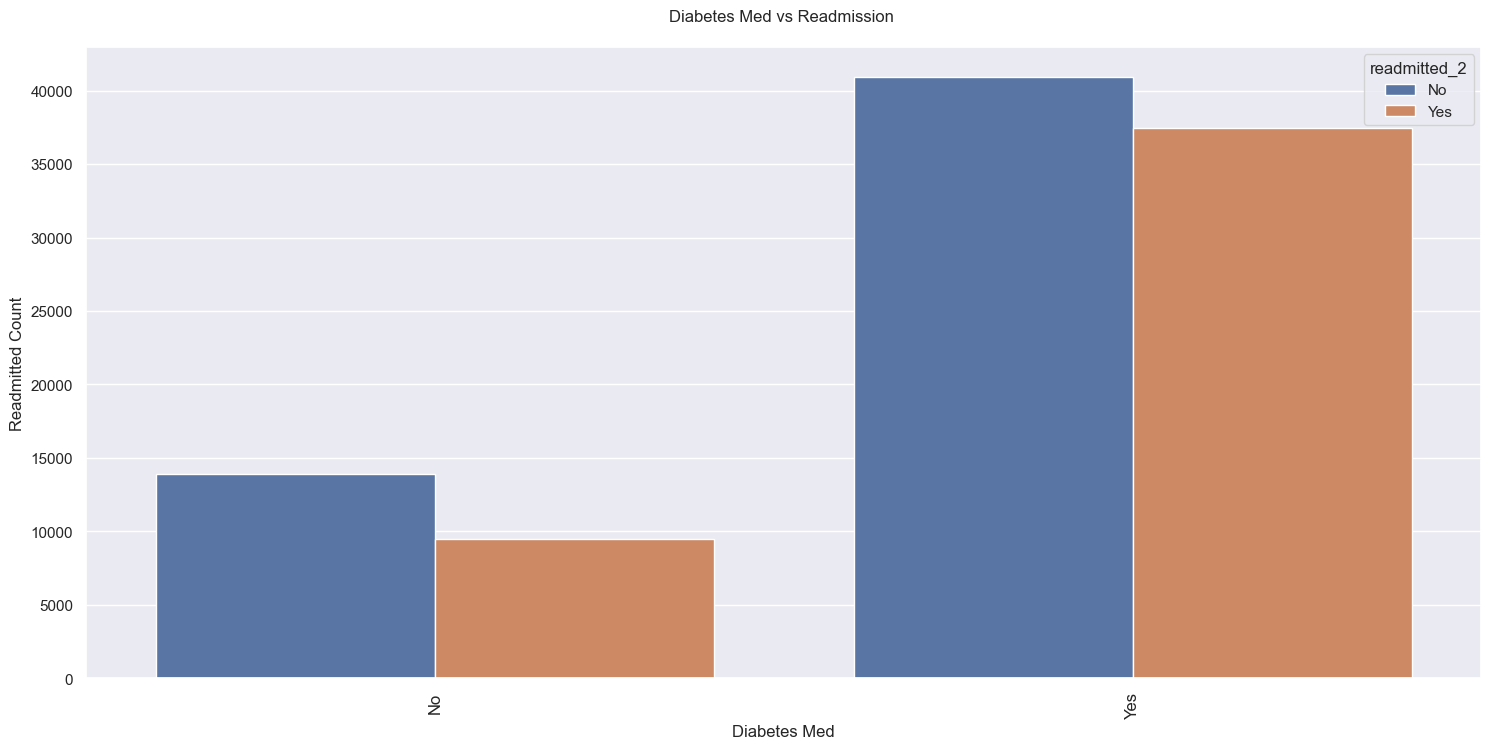

In [67]:
ax = sns.countplot(x='diabetesMed',  hue= 'readmitted_2',  data= df)
plt.xlabel('Diabetes Med', size = 12)
plt.xticks(rotation=90, size = 12)
plt.ylabel('Readmitted Count', size = 12)
plt.title('Diabetes Med vs Readmission \n', size = 12)
plt.show()

In [68]:
df.drop(columns = ['acetohexamide', 'tolbutamide', 'troglitazone', 'tolazamide', 'examide', 'citoglipton',
                   'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone',
                   'metformin-pioglitazone'], inplace = True)

In [69]:
df.shape


(101763, 41)

In [70]:
df = df[~((df['diag_1'] == "?") | (df['diag_2'] == "?") | (df['diag_3'] == "?"))]


In [71]:
df.shape


(100241, 41)

In [72]:
df_ = df.copy()


In [73]:
df_ = df_.drop(columns= ['encounter_id', 'patient_nbr', 'readmitted'])


In [74]:
df_


,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,acarbose,miglitol,insulin,glyburide-metformin,change,diabetesMed,readmitted_2,is_child,is_adult,is_senior
1,Caucasian,Female,10,1,1,7,3,59,0,18,...,No,No,Up,No,Ch,Yes,Yes,1,0,0
2,AfricanAmerican,Female,20,1,1,7,2,11,5,13,...,No,No,No,No,No,Yes,No,0,1,0
3,Caucasian,Male,30,1,1,7,2,44,1,16,...,No,No,Up,No,Ch,Yes,No,0,1,0
4,Caucasian,Male,40,1,1,7,1,51,0,8,...,No,No,Steady,No,Ch,Yes,No,0,1,0
5,Caucasian,Male,50,2,1,2,3,31,6,16,...,No,No,Steady,No,No,Yes,Yes,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101758,AfricanAmerican,Male,70,1,3,7,3,51,0,16,...,No,No,Down,No,Ch,Yes,Yes,0,0,1
101759,AfricanAmerican,Female,80,1,4,5,5,33,3,18,...,No,No,Steady,No,No,Yes,No,0,0,1
101760,Caucasian,Male,70,1,1,7,1,53,0,9,...,No,No,Down,No,Ch,Yes,No,0,0,1
101761,Caucasian,Female,80,2,3,7,10,45,2,21,...,No,No,Up,No,Ch,Yes,No,0,0,1


In [75]:
df_[['time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 
   'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses']].corr()

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
time_in_hospital,1.000000,0.319328,0.189262,0.463840,-0.010366,-0.010421,0.072412,0.210353
num_lab_procedures,0.319328,1.000000,0.058283,0.268948,-0.007713,-0.002240,0.038665,0.151184
num_procedures,0.189262,0.058283,1.000000,0.383102,-0.026398,-0.038563,-0.067989,0.060142
num_medications,0.463840,0.268948,0.383102,1.000000,0.043229,0.012260,0.061969,0.244153
number_outpatient,-0.010366,-0.007713,-0.026398,0.043229,1.000000,0.091531,0.107052,0.092965
number_emergency,-0.010421,-0.002240,-0.038563,0.012260,0.091531,1.000000,0.267318,0.055976
number_inpatient,0.072412,0.038665,-0.067989,0.061969,0.107052,0.267318,1.000000,0.102597
number_diagnoses,0.210353,0.151184,0.060142,0.244153,0.092965,0.055976,0.102597,1.000000


In [76]:
df_ = df_.drop(columns= ['number_outpatient', 'number_emergency', 'number_inpatient'])


In [77]:
df_.columns


Index(['race', 'gender', 'age', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'num_lab_procedures', 'num_procedures', 'num_medications', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'glipizide', 'glyburide', 'pioglitazone',
       'rosiglitazone', 'acarbose', 'miglitol', 'insulin',
       'glyburide-metformin', 'change', 'diabetesMed', 'readmitted_2',
       'is_child', 'is_adult', 'is_senior'],
      dtype='object')

In [78]:
df_.shape


(100241, 35)

In [79]:
# Import necessary libraries
from sklearn.preprocessing import OneHotEncoder

# Define categorical columns
categorical_cols = ['race', 'gender', 'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide', 
                    'chlorpropamide', 'glimepiride', 'glipizide', 'glyburide', 'pioglitazone', 'rosiglitazone', 
                    'acarbose', 'miglitol', 'insulin', 'glyburide-metformin', 'change', 'diabetesMed']

# Initialize OneHotEncoder
onehot_encoder = OneHotEncoder(handle_unknown='ignore')

# Fit and transform the data using OneHotEncoder
transformed_data_onehot = onehot_encoder.fit_transform(df[categorical_cols])

# Convert sparse matrix to dense array
dense_array = transformed_data_onehot.toarray()

# Print dense array
print("Data after One-Hot Encoding (Dense Representation):")
print(dense_array[:5])



Data after One-Hot Encoding (Dense Representation):
[[0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0.
  1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0.
  1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 1.]
 [1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0.
  1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0.
  1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1.]
 [0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0.
  1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0.
  1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0.
  1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0.
  1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 

In [80]:
# Import necessary library
from sklearn.preprocessing import StandardScaler

# Define numerical columns
numerical_cols = ['age', 'time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 
                   'number_diagnoses', 'is_child', 
                  'is_adult', 'is_senior']

# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform the data using StandardScaler
transformed_data_scaled = scaler.fit_transform(df[numerical_cols])

# Print transformed data
print("Data after Feature Scaling:")
print(transformed_data_scaled[:5])


Data after Feature Scaling:
[[-3.29012721 -0.47482174  0.80370808 -0.78920088  0.2318987   0.81704169
  13.66445127 -1.07925836 -0.91667738]
 [-2.64848324 -0.80913096 -1.633924    2.1332546  -0.38413752 -0.81383658
  -0.07318259  0.9265622  -0.91667738]
 [-2.00683927 -0.80913096  0.04194806 -0.20470978 -0.01451579 -0.27021049
  -0.07318259  0.9265622  -0.91667738]
 [-1.3651953  -1.14344018  0.39743607 -0.78920088 -1.00017374 -1.35746268
  -0.07318259  0.9265622  -0.91667738]
 [-0.72355133 -0.47482174 -0.61824396  2.7177457  -0.01451579  0.81704169
  -0.07318259  0.9265622  -0.91667738]]


In [81]:
# Import necessary libraries
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
import pandas as pd

# Assume df_ is your DataFrame
# Define columns for PCA (numeric and one-hot encoded categorical)
columns_for_pca = ['age', 'time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 
                    'number_diagnoses']

categorical_cols = ['race', 'gender', 'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide', 
                    'chlorpropamide', 'glimepiride', 'glipizide', 'glyburide', 'pioglitazone', 'rosiglitazone', 
                    'acarbose', 'miglitol', 'insulin', 'glyburide-metformin', 'change', 'diabetesMed']

# Define preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', columns_for_pca),
        ('cat', OneHotEncoder(), categorical_cols)
    ])

# Define PCA
pca = PCA(n_components=2)

# Create a pipeline with preprocessing and PCA
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('pca', pca)])

# Fit and transform the data using the pipeline
transformed_data_pca = pipeline.fit_transform(df_)

# Print transformed data
print("Data after PCA Transformation:")
print(transformed_data_pca[:5])


Data after PCA Transformation:
[[ 13.76589041  51.85276638]
 [-34.02726097  39.95180388]
 [ -0.59880173  31.32104432]
 [  5.58341479  21.73658089]
 [-12.53147251  10.75123418]]


In [82]:
from sklearn.model_selection import train_test_split

# Split the dataset into features (X) and target variable (y)
X = df_.drop(columns=['readmitted_2'])  # Features
y = df_['readmitted_2']  # Target variable

# Split the data into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Further split the test set into validation and test sets (50% validation, 50% test)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

# Display the shapes of the resulting datasets
print("Shape of train dataset:", X_train.shape)
print("Sample train dataset:", X_train.head())
print("Shape of y_train:", y_train.shape)
print("Shape of X_val:", X_val.shape)
print("Shape of y_val:", y_val.shape)
print("Shape of test dataset:", X_test.shape)
print("Sample test dataset:", X_test.head())


Shape of train dataset: (80192, 34)
Sample train dataset:                   race  gender  age  admission_type_id  \
52597        Caucasian  Female   80                  1   
59448  AfricanAmerican  Female   20                  3   
57207        Caucasian    Male   50                  1   
47163  AfricanAmerican    Male   50                  2   
70474        Caucasian    Male   60                  1   

       discharge_disposition_id  admission_source_id  time_in_hospital  \
52597                         6                    7                 6   
59448                         1                    1                 5   
57207                         1                    7                10   
47163                         1                    1                 1   
70474                         1                    7                 2   

       num_lab_procedures  num_procedures  num_medications  ... rosiglitazone  \
52597                  47               1               21  ...    

In [86]:
df_.to_csv('preprocessed_data.csv', index=False)

In [88]:
import pandas as pd

# Load the preprocessed CSV file
ClinicalNotes = pd.read_csv('preprocessed_data.csv')

# Define function to generate clinical notes
def generate_clinical_notes(row):
    # Example template for admission note
    note_template = f"""
    Admission Note
    --------------
    Patient Information:
    - Race: {row['race']}
    - Gender: {row['gender']}
    - Age: {row['age']}
    
    Admission Details:
    - Admission Type: {row['admission_type_id']}
    - Discharge Disposition: {row['discharge_disposition_id']}
    - Admission Source: {row['admission_source_id']}
    - Time in Hospital: {row['time_in_hospital']}
    - Number of Lab Procedures: {row['num_lab_procedures']}
    - Number of Procedures: {row['num_procedures']}
    - Number of Medications: {row['num_medications']}
    
    Diagnoses:
    - Primary Diagnosis: {row['diag_1']}
    - Secondary Diagnosis: {row['diag_2']}
    - Tertiary Diagnosis: {row['diag_3']}
    - Number of Diagnoses: {row['number_diagnoses']}
    
    Medication Information:
    - Metformin: {row['metformin']}
    - Repaglinide: {row['repaglinide']}
    - Nateglinide: {row['nateglinide']}
    - Chlorpropamide: {row['chlorpropamide']}
    - Glimepiride: {row['glimepiride']}
    - Glipizide: {row['glipizide']}
    - Glyburide: {row['glyburide']}
    - Pioglitazone: {row['pioglitazone']}
    - Rosiglitazone: {row['rosiglitazone']}
    - Acarbose: {row['acarbose']}
    - Miglitol: {row['miglitol']}
    - Insulin: {row['insulin']}
    - Glyburide-Metformin: {row['glyburide-metformin']}
    
    Treatment Information:
    - Change in Medication: {row['change']}
    - Diabetes Medication: {row['diabetesMed']}
    
    Readmission Status:
    - Readmitted: {row['readmitted_2']}
    
    Age Category:
    - Child: {row['is_child']}
    - Adult: {row['is_adult']}
    - Senior: {row['is_senior']}
    """

    return note_template

# Apply the function to each row and generate clinical notes
df['clinical_notes'] = df.apply(generate_clinical_notes, axis=1)

# Save the clinical notes to a text file
df['clinical_notes'].to_csv('clinical_notes.txt', index=False, header=False)

print("Clinical notes generated and saved successfully.")


Clinical notes generated and saved successfully.


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from transformers import XLNetTokenizer, XLNetForSequenceClassification, AdamW
import torch
from torch.utils.data import TensorDataset, DataLoader, RandomSampler
from sklearn.metrics import accuracy_score



# Choose relevant columns as features
selected_features = ['race', 'gender', 'age', 'num_lab_procedures', 'num_procedures', 'num_medications', 'diag_1', 'diag_2', 'diag_3', 'change', 'diabetesMed']
X = df_[selected_features]
y = df_['readmitted_2']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Preprocessing for text data (if any)
# Tokenize and encode sequences
tokenizer = XLNetTokenizer.from_pretrained('xlnet-base-cased')
max_len = 128  # Max sequence length for XLNet

def tokenize_text(text):
    encoded_dict = tokenizer.encode_plus(
                        text,                      # Text to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                        max_length = max_len,      # Pad & truncate all sentences.
                        padding = 'max_length',    # Pad to max_length
                        truncation = True,         # Explicitly truncate to max_length
                        return_attention_mask = True,   # Construct attn. masks.
                        return_tensors = 'pt',     # Return pytorch tensors.
                   )
    return encoded_dict['input_ids'], encoded_dict['attention_mask']

# Tokenize and encode text columns
X_train_tokens = []
X_train_masks = []
for idx, row in X_train.iterrows():
    text_values = [str(value) for value in row.values]  # Convert all values to strings
    input_ids, attention_mask = tokenize_text(' '.join(text_values))
    X_train_tokens.append(input_ids)
    X_train_masks.append(attention_mask)

X_train_tokens = torch.cat(X_train_tokens, dim=0)
X_train_masks = torch.cat(X_train_masks, dim=0)

# Convert labels to numeric format
labels_train = (y_train == 'Yes').astype(int)
labels_train = torch.tensor(labels_train.values)

# Convert data into PyTorch DataLoader
batch_size = 32
train_data = TensorDataset(X_train_tokens, X_train_masks, labels_train)
train_sampler = RandomSampler(train_data)
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)

# Fine-tuning the XLNet model
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = XLNetForSequenceClassification.from_pretrained('xlnet-base-cased', num_labels=2)
model.to(device)
optimizer = AdamW(model.parameters(), lr=2e-5)

# Training loop
epochs = 3
for epoch in range(epochs):
    model.train()
    total_loss = 0
    for batch in train_dataloader:
        batch = tuple(t.to(device) for t in batch)
        inputs = {'input_ids': batch[0],
                  'attention_mask': batch[1],
                  'labels': batch[2]}
        optimizer.zero_grad()
        outputs = model(**inputs)
        loss = outputs.loss
        total_loss += loss.item()
        loss.backward()
        optimizer.step()
    avg_train_loss = total_loss / len(train_dataloader)

# Evaluation on test set
model.eval()
predictions = []
with torch.no_grad():
    for idx, row in X_test.iterrows():
        text_values = [str(value) for value in row.values]  # Convert all values to strings
        input_ids, attention_mask = tokenize_text(' '.join(text_values))
        inputs = {'input_ids': input_ids.to(device),
                  'attention_mask': attention_mask.to(device)}
        outputs = model(**inputs)
        logits = outputs.logits
        predictions.extend(logits.argmax(dim=-1).cpu().numpy())

# Convert predictions to numpy array
predictions = np.array(predictions)

accuracy = accuracy_score(y_test, predictions)

print(f'Accuracy: {accuracy}')


Some weights of XLNetForSequenceClassification were not initialized from the model checkpoint at xlnet-base-cased and are newly initialized: ['logits_proj.weight', 'sequence_summary.summary.bias', 'sequence_summary.summary.weight', 'logits_proj.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from transformers import XLNetTokenizer, XLNetForSequenceClassification, AdamW
import torch
from torch.utils.data import TensorDataset, DataLoader, RandomSampler
from sklearn.metrics import accuracy_score


# Choose relevant columns as features
selected_features = ['race', 'gender', 'age', 'num_lab_procedures', 'num_procedures', 'num_medications', 'diag_1', 'diag_2', 'diag_3', 'change', 'diabetesMed']
X = df_[selected_features]
y = df_['readmitted_2']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Preprocessing for text data (if any)
# Tokenize and encode sequences
tokenizer = XLNetTokenizer.from_pretrained('xlnet-base-cased')
max_len = 128  # Max sequence length for XLNet

def tokenize_text(text):
    encoded_dict = tokenizer.encode_plus(
                        text,                      # Text to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                        max_length = max_len,      # Pad & truncate all sentences.
                        pad_to_max_length = True,
                        return_attention_mask = True,   # Construct attn. masks.
                        return_tensors = 'pt',     # Return pytorch tensors.
                   )
    return encoded_dict['input_ids'], encoded_dict['attention_mask']

# Tokenize and encode text columns
X_train_tokens = []
X_train_masks = []
for idx, row in X_train.iterrows():
    input_ids, attention_mask = tokenize_text(' '.join(row))
    X_train_tokens.append(input_ids)
    X_train_masks.append(attention_mask)

X_train_tokens = torch.cat(X_train_tokens, dim=0)
X_train_masks = torch.cat(X_train_masks, dim=0)

# Convert labels to tensor
labels_train = torch.tensor(y_train)

# Convert data into PyTorch DataLoader
batch_size = 32
train_data = TensorDataset(X_train_tokens, X_train_masks, labels_train)
train_sampler = RandomSampler(train_data)
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)

# Fine-tuning the XLNet model
model = XLNetForSequenceClassification.from_pretrained('xlnet-base-cased', num_labels=2)
optimizer = AdamW(model.parameters(), lr=2e-5)

# Training loop
epochs = 3
for epoch in range(epochs):
    model.train()
    total_loss = 0
    for batch in train_dataloader:
        batch = tuple(t.to(device) for t in batch)
        inputs = {'input_ids': batch[0],
                  'attention_mask': batch[1],
                  'labels': batch[2]}
        optimizer.zero_grad()
        outputs = model(**inputs)
        loss = outputs.loss
        total_loss += loss.item()
        loss.backward()
        optimizer.step()
    avg_train_loss = total_loss / len(train_dataloader)

# Evaluation on test set
model.eval()
predictions = []
with torch.no_grad():
    for idx, row in X_test.iterrows():
        input_ids, attention_mask = tokenize_text(' '.join(row))
        inputs = {'input_ids': input_ids.to(device),
                  'attention_mask': attention_mask.to(device)}
        outputs = model(**inputs)
        logits = outputs.logits
        predictions.extend(logits.argmax(dim=-1).cpu().numpy())

# Convert predictions to numpy array
predictions = np.array(predictions)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)

print(f'Accuracy: {accuracy}')
